# Modelo de Regresión Lineal, usando datos simulados

\begin{align*}
\large
y = a + bx
\end{align*}

* X :  100 valores distribuidos según una N(mu = 1.5, sd = 2)

\begin{align*}
\large
y = 4 + 2x + \epsilon
\end{align*}

* e :  valores distribuidos según una N(0, 0.9)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(0)
x = np.random.normal(1.5,2,100)

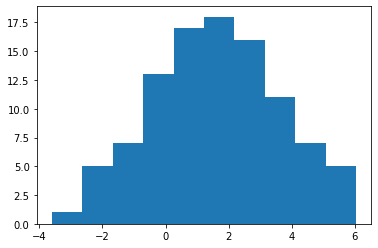

In [3]:
plt.hist(x)
plt.show()

In [4]:
np.random.seed(1)
res = np.random.normal(0,0.9,100)

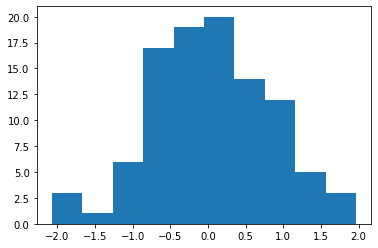

In [5]:
plt.hist(res)
plt.show()

In [6]:
y_pred = 4 + 2 * x

In [7]:
y_actual = 4 + 2 * x + res

In [8]:
x_list=x.tolist()
y_pred_list=y_pred.tolist()
y_act_list=y_actual.tolist()

In [9]:
data=pd.DataFrame({"x":x_list, "y_actual":y_act_list, "y_pred":y_pred_list})
data.head()

,x,y_actual,y_pred
0,5.028105,15.518120,14.056209
1,2.300314,8.050048,8.600629
2,3.457476,10.439597,10.914952
3,5.981786,14.997901,15.963573
4,5.235116,15.249099,14.470232


Text(0.5, 1.0, 'Valor actual vs Predicción')

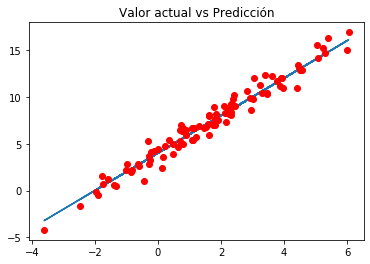

In [10]:
plt.plot(x,y_pred)
plt.plot(x,y_actual,"ro")
plt.title("Valor actual vs Predicción")

In [11]:
y_media = [np.mean(y_actual) for i in range(1, len(x_list)+1)]

Text(0.5, 1.0, 'Valor actual vs Predicción')

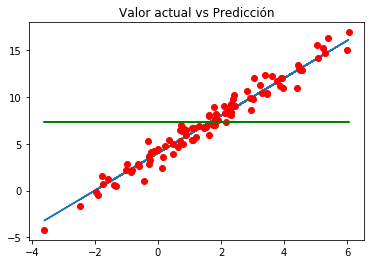

In [12]:
plt.plot(x, y_pred)
plt.plot(x, y_actual,"ro")
plt.plot(x, y_media,"g")
plt.title("Valor actual vs Predicción")

**En un mundo ideal:**

\begin{align*}
SST=SSR+SSD
\end{align*}


La suma de los cuadrados totales es igual a la suma de los cuadrados de la refresión mas la suma de los cuadrados de la diferencia.

\begin{align*}
SSR=\sum{(y_r-\bar{y})^2}
\end{align*}

\begin{align*}
SSD=\sum{(y_i-y_r)^2}
\end{align*}

\begin{align*}
SST=\sum{(y_i-\bar{y})^2}
\end{align*}

In [13]:
data["SSR"]= (data.y_pred-y_media)**2
data["SSD"]= (data.y_actual-data.y_pred)**2
data["SST"]= (data.y_actual-y_media)**2

In [14]:
data.head()

,x,y_actual,y_pred,SSR,SSD,SST
0,5.028105,15.518120,14.056209,45.730767,2.137183,67.640156
1,2.300314,8.050048,8.600629,1.707915,0.303139,0.571977
2,3.457476,10.439597,10.914952,13.113055,0.225962,9.896314
3,5.981786,14.997901,15.963573,75.165712,0.932522,59.353841
4,5.235116,15.249099,14.470232,51.501798,0.606634,63.287469


In [15]:
SSR=sum(data.SSR)
SSD=sum(data.SSD)
SST=sum(data.SST)
print(SSR)
print(SSD)
print(SST)

1625.6198835831058
63.76091619287372
1784.7480121288086


In [16]:
SSR+SSD

1689.3807997759795

Calculemos el coeficiente de correlación mediante la siguiente fórmula:
\begin{align*}
R^2=\frac{SSR}{SST}
\end{align*}

In [17]:
R2=SSR/SST
print(R2)

0.9108400023620712


## Obteniendo la recta de regresión

 La recta de regresión lineal simple tiene la siguiente forma:
 
 \begin{align*}
 y=a+bx
 \end{align*}
 
 donde a es la ordenada al origen y b la pendiente
 
 Los parámetros de la regresión simple se calculan mediante:
 
\begin{align*}
b=\frac{\sum(x-\bar{x})(y-\bar{y})}{\sum(x-\bar{x})^2}
\end{align*}

\begin{align*}
a=\bar{y}-b\bar{x}
\end{align*}

In [18]:
x_mean=np.mean(data.x)
y_mean=np.mean(data.y_actual)
x_mean,y_mean

(1.6196160310689693, 7.293756629006068)

In [19]:
data["b_numerador"]=(data.x-x_mean)*(data.y_actual-y_mean)
data["b_denominador"]=(data.x-x_mean)**2

In [20]:
data.head()

,x,y_actual,y_pred,SSR,SSD,SST,b_numerador,b_denominador
0,5.028105,15.518120,14.056209,45.730767,2.137183,67.640156,28.032650,11.617795
1,2.300314,8.050048,8.600629,1.707915,0.303139,0.571977,0.514806,0.463350
2,3.457476,10.439597,10.914952,13.113055,0.225962,9.896314,5.781615,3.377729
3,5.981786,14.997901,15.963573,75.165712,0.932522,59.353841,33.606790,19.028530
4,5.235116,15.249099,14.470232,51.501798,0.606634,63.287469,28.762539,13.071840


In [21]:
b=sum(data.b_numerador)/sum(data.b_denominador)

In [22]:
a=y_mean-b*x_mean

In [23]:
a,b

(3.9588996937833985, 2.0590416933707534)

\begin{align*}
y_{modelo}=3.9689+2.059x
\end{align*}

El modelo de regresión ya contiene el parametro dado por el error con el que se había iniciado el problema. Al ya estar ajustado es posible pensar que se puede obtener una mejor predicción del ejemplo:

In [24]:
data["y_modelo"]=a+b*data.x
data.head()

,x,y_actual,y_pred,SSR,SSD,SST,b_numerador,b_denominador,y_modelo
0,5.028105,15.518120,14.056209,45.730767,2.137183,67.640156,28.032650,11.617795,14.311977
1,2.300314,8.050048,8.600629,1.707915,0.303139,0.571977,0.514806,0.463350,8.695343
2,3.457476,10.439597,10.914952,13.113055,0.225962,9.896314,5.781615,3.377729,11.077987
3,5.981786,14.997901,15.963573,75.165712,0.932522,59.353841,33.606790,19.028530,16.275647
4,5.235116,15.249099,14.470232,51.501798,0.606634,63.287469,28.762539,13.071840,14.738222


In [25]:
SSR_2= sum((data.y_modelo-y_mean)**2)
SSD_2= sum((data.y_modelo-data.y_actual)**2)
SST_2= sum((data.y_actual-y_mean)**2)

In [26]:
print(SSR_2)
print(SSD_2)
print(SST_2)

1722.700825538816
62.04718658999103
1784.7480121288093


In [27]:
SSR_2+SSD_2

1784.748012128807

In [28]:
R2_2=SSR_2/SST_2
print(R2_2)

0.9652347635810028


Text(0.5, 1.0, 'Valor actual vs Predicción')

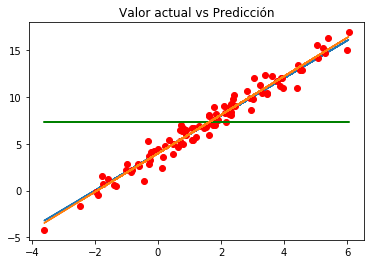

In [29]:
plt.plot(data.x, data.y_pred)
plt.plot(data.x, data.y_actual,"ro")
plt.plot(data.x, y_media,"g")
plt.plot(data.x, data.y_modelo)
plt.title("Valor actual vs Predicción")

## Error estandar de los residuos (RSE)

\begin{align*}
RSE=\sqrt{\frac{SSD}{n-k-1}}
\end{align*}

Donde $n$ representa el número de filas en el DataFrame, $k$ el número de variables predictoras.

In [30]:
RSE=np.sqrt(SSD/(len(data)-2))
RSE

0.8066111788246143

In [31]:
np.mean(data.y_actual)

7.293756629006068

In [32]:
error_prom=RSE/np.mean(data.y_actual)
error_prom

0.11058926419574443

## Regresión Lineal en Python

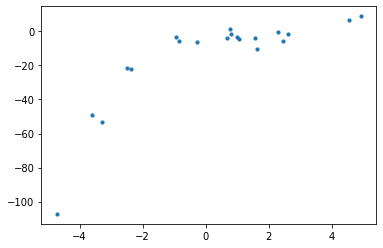

In [50]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)
plt.scatter(x,y, s=10)
plt.show()

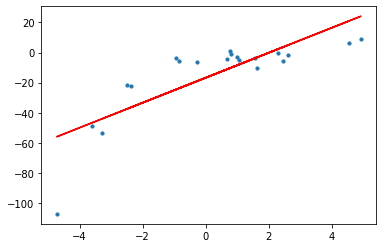

In [51]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

# Transformando los datos a arreglos bidimensionales para Scikit Learn
x = x[:, np.newaxis]
y = y[:, np.newaxis]

# Entrenando el modelo
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

plt.scatter(x, y, s=10)
plt.plot(x, y_pred, color='r')
plt.show()


In [64]:
print(" Pendiente:\t\t",model.coef_,"\n","Ordenada al origen:\t", model.intercept_)

 Pendiente:		 [[8.29238755]] 
 Ordenada al origen:	 [-16.79645067]


In [44]:
from sklearn.metrics import mean_squared_error, r2_score

r2=r2_score(y,y_pred)
MSE=mean_squared_error(y,y_pred)
RMSE=MSE**0.5

print(r2,MSE,RMSE)

0.6386750054827146 253.07217948430372 15.908242501429998


10.120437473614711
0.8537647164420812


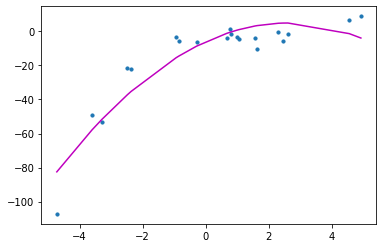

In [95]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

# Transformando los datos a arreglos bidimensionales para Scikit Learn
x = x[:, np.newaxis]
y = y[:, np.newaxis]

# Ajustando los valores de X de acuerdo al grado del polinomio
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

# Entrenando el modelo
model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)

plt.scatter(x, y, s=10)
# Para la segunda gráfica, será necesario ordenar los datos
sorted_zip = sorted(zip(x,y_poly_pred))
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()

In [123]:
def regresion_pol(grado, X, Y):
    import numpy as np
    import matplotlib.pyplot as plt

    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import mean_squared_error, r2_score
    from sklearn.preprocessing import PolynomialFeatures

    # Transformando los datos a arreglos bidimensionales para Scikit Learn
    x = X[:, np.newaxis]
    y = Y[:, np.newaxis]

    # Ajustando los valores de X de acuerdo al grado del polinomio
    polynomial_features= PolynomialFeatures(degree=grado)
    x_poly = polynomial_features.fit_transform(x)

    # Entrenando el modelo
    model = LinearRegression()
    model.fit(x_poly, y)
    y_poly_pred = model.predict(x_poly)

    rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
    r2 = r2_score(y,y_poly_pred)

    # Para la segunda gráfica, será necesario ordenar los datos
    sorted_zip = sorted(zip(x,y_poly_pred))
    x, y_poly_pred = zip(*sorted_zip)
    lineas=["-","--","-:",":"]
    grafica=plt.plot(x, y_poly_pred, 
                     color=(np.random.rand(),np.random.rand(),np.random.rand(),1),
                    linestyle=np.random.choice(lineas))
    return grafica, r2, rmse

In [124]:
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

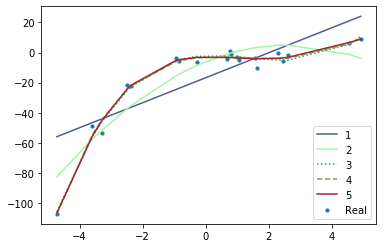

In [125]:
plt.scatter(x, y, s=10)
leyenda=[]
for n in range(1,6):
    regresion_pol(n, x, y)[0]
    leyenda.append(n)
leyenda.append("Real")
plt.legend(leyenda,loc=4)
plt.show()

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
df=pd.read_csv("Datasets\Advertising.csv")

In [82]:
df[:5]

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [83]:
df.drop(df.columns[0], axis=1, inplace=True)

In [84]:
medios=df.columns
medios=list(medios)
medios.remove("Sales")
medios

['TV', 'Radio', 'Newspaper']

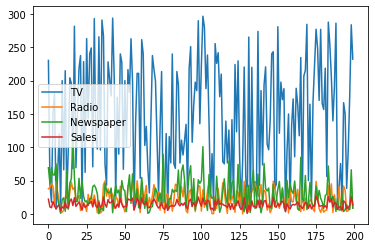

In [85]:
df.plot()
plt.show()

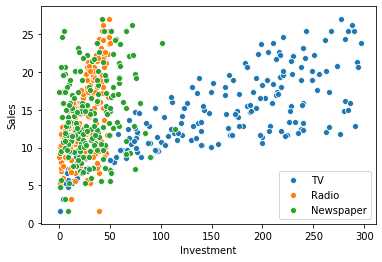

In [86]:
for medio in medios:
    sns.scatterplot(x=medio, y="Sales", data=df)
plt.xlabel("Investment")
plt.legend(medios)
plt.show()